# TLSH Basic Tutorial / TLSH 基礎教學
## Understanding Similarity Hashing / 理解相似性雜湊

---

### Learning Objectives / 學習目標:
1. **Similarity Detection**: Understand TLSH vs traditional hashing / **相似性檢測**：了解 TLSH 與傳統雜湊的差異
2. **Distance Analysis**: Learn to interpret TLSH distances / **距離分析**：學習解讀 TLSH 距離
3. **Basic Concepts**: See how TLSH measures similarity / **基本概念**：觀察 TLSH 如何測量相似性
4. **Enterprise Application**: Apply TLSH to real-world problems / **企業應用**：將 TLSH 應用於真實問題

### ⚠️ Important Note / 重要說明:
**We are using a modified version of TLSH library for this workshop due to different dependency environments in the classroom. This is not the original TLSH package.**

**我們在此工作坊中使用修改過的 TLSH 函式庫，由於課堂環境的依賴性不同。這不是原始的 TLSH 套件。**

## Step 1: Setup and Installation / 步驟 1：環境設置

In [2]:
# Note: We use a patched TLSH implementation for this workshop(https://github.com/calladoum-elastic/tlsh)
# 注意：我們在此工作坊中使用自定義的 TLSH 實作

try:
    import tlsh
    print("✅ TLSH library loaded (custom version for workshop)")
    print("✅ TLSH 函式庫已載")
except ImportError:
    print("❌ TLSH library not available")
    print("❌ TLSH 函式庫無法使用")
    print("Please install with: pip install tlsh-python")
    print("請使用以下指令安裝：pip install tlsh-python")

import hashlib
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

✅ TLSH library loaded (custom version for workshop)
✅ TLSH 函式庫已載


## Step 2: Traditional Hash vs TLSH Comparison / 步驟 2：傳統雜湊 vs TLSH 對比

### Why TLSH is Different / 為什麼 TLSH 不同

Traditional hashes like SHA256 are designed for **exact matching** - even a tiny change results in a completely different hash. TLSH is designed for **similarity detection** - small changes result in small distance changes.

傳統的雜湊如 SHA256 是為了**精確匹配**而設計 - 即使微小的變化也會導致完全不同的雜湊。TLSH 是為了**相似性偵測**而設計 - 小變化會導致小距離變化。

In [3]:
# Demo: Traditional Hash vs TLSH
# 示範：傳統雜湊 vs TLSH

text1 = "Hello, this is a sample text for demonstration. " * 10
text2 = "Hello, this is a sample text for demonstration! " * 10  # Only changed . to !

print("📝 Two very similar strings / 兩個非常相似的字串:")
print(f"Text 1: {text1[:50]}...")
print(f"Text 2: {text2[:50]}...")
print("🔍 Only difference: '.' → '!' at the end / 唯一差異：結尾的 '.' → '!'\n")

# Traditional Hash (SHA256) - 傳統雜湊
sha1_hash = hashlib.sha256(text1.encode()).hexdigest()
sha2_hash = hashlib.sha256(text2.encode()).hexdigest()

print("🔒 Traditional SHA256 Hashes / 傳統 SHA256 雜湊:")
print(f"SHA1: {sha1_hash[:32]}...")
print(f"SHA2: {sha2_hash[:32]}...")
print(f"Are they identical? / 它們相同嗎？ {sha1_hash == sha2_hash}")
print("💡 Traditional hash: Small change = Completely different hash")
print("💡 傳統雜湊：小變化 = 完全不同的雜湊\n")

# TLSH Hash - TLSH 雜湊
t1 = tlsh.Tlsh()
t1.update(text1.encode('utf-8'))
t1.final()
tlsh1_hash = t1.hexdigest()

t2 = tlsh.Tlsh()
t2.update(text2.encode('utf-8'))
t2.final()
tlsh2_hash = t2.hexdigest()

print("🎯 TLSH Hashes / TLSH 雜湊:")
print(f"TLSH1: {tlsh1_hash}")
print(f"TLSH2: {tlsh2_hash}")

# Calculate TLSH distance - 計算 TLSH 距離
distance = t1.diff(t2)
print(f"\n📏 TLSH Distance / TLSH 距離: {distance}")
print("💡 TLSH: Small change = Small distance (still detects similarity!)")
print("💡 TLSH：小變化 = 小距離（仍然可以偵測相似性！）")

📝 Two very similar strings / 兩個非常相似的字串:
Text 1: Hello, this is a sample text for demonstration. He...
Text 2: Hello, this is a sample text for demonstration! He...
🔍 Only difference: '.' → '!' at the end / 唯一差異：結尾的 '.' → '!'

🔒 Traditional SHA256 Hashes / 傳統 SHA256 雜湊:
SHA1: 074cd4370870c9306dd5404247026025...
SHA2: e56374e96087f664f530218bb37655ac...
Are they identical? / 它們相同嗎？ False
💡 Traditional hash: Small change = Completely different hash
💡 傳統雜湊：小變化 = 完全不同的雜湊

🎯 TLSH Hashes / TLSH 雜湊:
TLSH1: T1D0F00445134D11D7C40D30734D0C3141C37D45D5347951C13D5F773135144011935DD4
TLSH2: T1F6F00445134D51D7C40D30334D0C7141437D45D5347542C53E5F773235104011575ED4

📏 TLSH Distance / TLSH 距離: 16
💡 TLSH: Small change = Small distance (still detects similarity!)
💡 TLSH：小變化 = 小距離（仍然可以偵測相似性！）


## Step 3: TLSH Distance Examples / 步驟 3：TLSH 距離範例

Let's see how TLSH distance changes as we make progressively larger modifications to text.

讓我們看看當我們對文字進行逐漸更大的修改時，TLSH 距離如何變化。

In [4]:
def calculate_tlsh_distance(text1, text2, description):
    """Helper function to calculate TLSH distance
    輔助函數來計算 TLSH 距離
    """
    t1 = tlsh.Tlsh()
    t1.update(text1.encode('utf-8'))
    t1.final()
    
    t2 = tlsh.Tlsh()
    t2.update(text2.encode('utf-8'))
    t2.final()
    
    distance = t1.diff(t2)
    print(f"{description:25} | Distance: {distance:3d}")
    return distance

# Test different levels of similarity - 測試不同程度的相似性
original = "The quick brown fox jumps over the lazy dog. " * 20

print("📊 TLSH Distance Examples / TLSH 距離範例:")
print("=" * 50)

# Test cases with properly increasing TLSH distances - 具有真正遞增 TLSH 距離的測試案例
examples = [
    ("Identical text / 相同文字", original, original),
    ("Minor punctuation / 微小標點", original, original.replace(".", "!")),
    ("Single word change / 單字變化", original, original.replace("brown", "orange")),
    ("Multiple word changes / 多字變化", original, original.replace("brown", "orange").replace("lazy", "sleepy").replace("quick", "fast")),
    ("Structure change / 結構變化", original, original.replace("The quick brown fox jumps over the lazy dog.", "A fast orange cat runs under the sleeping puppy.")),
    ("Content change / 內容變化", original, original[:len(original)//3] + "Different animals like elephants and tigers roam in the jungle safari. " * 20),
    ("Completely different / 完全不同", original, "Python programming language provides powerful data analysis tools and machine learning libraries. " * 20)
]

distances = []
for description, text1, text2 in examples:
    distance = calculate_tlsh_distance(text1, text2, description)
    distances.append(distance)

print("\n🎯 TLSH Distance Interpretation / TLSH 距離解釋:")
print("• Distance = 0: Same Data Family, identical content / 相同資料家族，內容相同")
print("• Distance > 0 and ≤ 100: Same Data Family, similar content / 相同資料家族，內容相似")
print("• Distance > 100: Different Data Family / 不同資料家族")

📊 TLSH Distance Examples / TLSH 距離範例:
Identical text / 相同文字     | Distance:   0
Minor punctuation / 微小標點  | Distance:  16
Single word change / 單字變化 | Distance:  38
Multiple word changes / 多字變化 | Distance: 127
Structure change / 結構變化   | Distance: 136
Content change / 內容變化     | Distance: 238
Completely different / 完全不同 | Distance: 222

🎯 TLSH Distance Interpretation / TLSH 距離解釋:
• Distance = 0: Same Data Family, identical content / 相同資料家族，內容相同
• Distance > 0 and ≤ 100: Same Data Family, similar content / 相同資料家族，內容相似
• Distance > 100: Different Data Family / 不同資料家族


In [5]:
# Exercise 2: Create your own distance test cases
# 練習 2：建立你自己的距離測試案例

# TODO: Test TLSH distances with different types of modifications
# 待辦：用不同類型的修改測試 TLSH 距離

# Ideas to try:
# - Change punctuation
# - Swap word order
# - Add/remove words
# - Change case

base_text = "Write your base text here for testing"

# Test case 1: Minor change
test1_text = base_text  # TODO: Make a small modification

# Test case 2: Moderate change  
test2_text = base_text  # TODO: Make a moderate modification

# Test case 3: Major change
test3_text = base_text  # TODO: Make a major modification

# Calculate and compare distances using the function from above
# calculate_tlsh_distance(text1=,text2=)

## Step 4: Visualizing TLSH Distances / 步驟 4：視覺化 TLSH 距離

Let's create a chart to see how distance changes with modification level.

讓我們建立一個圖表來看距離如何隨修改程度變化。

/var/folders/vf/qjxt62dx01x9lpvbgw6fdl100000gn/T/ipykernel_96497/3680292474.py:120: UserWarning: Glyph 30456 (\N{CJK UNIFIED IDEOGRAPH-76F8}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/vf/qjxt62dx01x9lpvbgw6fdl100000gn/T/ipykernel_96497/3680292474.py:120: UserWarning: Glyph 21516 (\N{CJK UNIFIED IDEOGRAPH-540C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/vf/qjxt62dx01x9lpvbgw6fdl100000gn/T/ipykernel_96497/3680292474.py:120: UserWarning: Glyph 24494 (\N{CJK UNIFIED IDEOGRAPH-5FAE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/vf/qjxt62dx01x9lpvbgw6fdl100000gn/T/ipykernel_96497/3680292474.py:120: UserWarning: Glyph 23567 (\N{CJK UNIFIED IDEOGRAPH-5C0F}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/vf/qjxt62dx01x9lpvbgw6fdl100000gn/T/ipykernel_96497/3680292474.py:120: UserWarning: Glyph 21934 (\N{CJK UNIFIED IDEOGRAPH-55AE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/vf

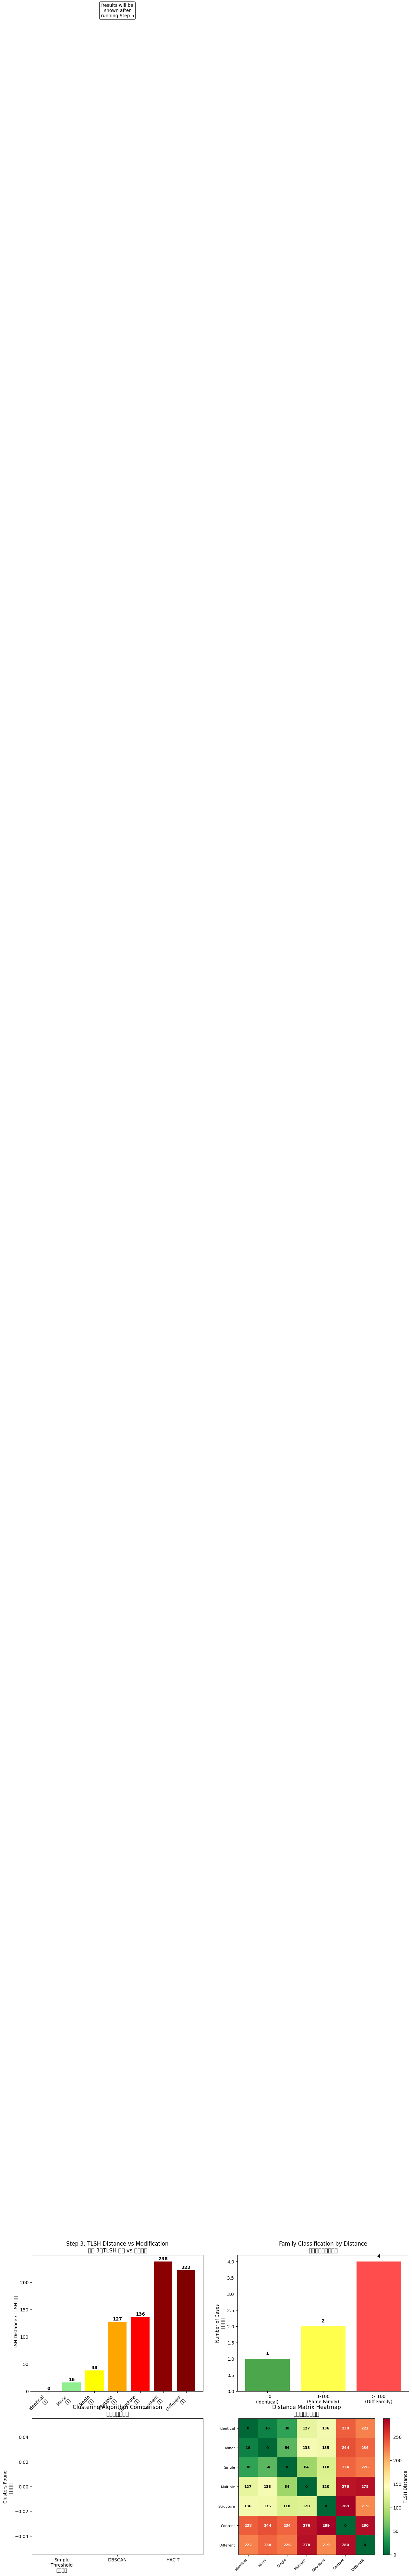

📊 Visualization Summary / 視覺化摘要:
• Top-left: Distance progression from text modifications / 左上：文字修改的距離進展
• Top-right: Family classification by distance thresholds / 右上：基於距離閾值的家族分類
• Bottom-left: Algorithm comparison placeholder / 左下：演算法比較（步驟5後更新）
• Bottom-right: Distance matrix with real TLSH distances / 右下：使用真實 TLSH 距離的矩陣


In [6]:
# -----------------------------
# TLSH Distance Visualization with Real Distance Matrix
# 使用真實 TLSH 距離矩陣的四圖示範
# -----------------------------

import tlsh
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# Step 1: Define text examples
# 定義文字範例
# -----------------------------
original = "The quick brown fox jumps over the lazy dog. " * 20

examples = [
    ("Identical text / 相同文字", original, original),
    ("Minor punctuation / 微小標點", original, original.replace(".", "!")),
    ("Single word change / 單字變化", original, original.replace("brown", "orange")),
    ("Multiple word changes / 多字變化", original, original.replace("brown", "orange").replace("lazy", "sleepy").replace("quick", "fast")),
    ("Structure change / 結構變化", original, original.replace("The quick brown fox jumps over the lazy dog.", "A fast orange cat runs under the sleeping puppy.")),
    ("Content change / 內容變化", original, original[:len(original)//3] + "Different animals like elephants and tigers roam in the jungle safari. " * 20),
    ("Completely different / 完全不同", original, "Python programming language provides powerful data analysis tools and machine learning libraries. " * 20)
]

# -----------------------------
# Step 2: Helper function to calculate TLSH distance
# 輔助函數計算 TLSH 距離
# -----------------------------
def calculate_tlsh_distance(text1, text2):
    t1 = tlsh.Tlsh()
    t1.update(text1.encode('utf-8'))
    t1.final()
    
    t2 = tlsh.Tlsh()
    t2.update(text2.encode('utf-8'))
    t2.final()
    
    return t1.diff(t2)

# -----------------------------
# Step 3: Calculate distances vs original
# 計算每個修改版 vs 原文的距離
# -----------------------------
distances = [calculate_tlsh_distance(original, text2) for _, _, text2 in examples]

# -----------------------------
# Step 4: Calculate full distance matrix (all pairs)
# 計算完整兩兩距離矩陣
# -----------------------------
texts = [text2 for _, _, text2 in examples]
n = len(texts)
distance_matrix = np.zeros((n, n), dtype=int)

for i in range(n):
    for j in range(n):
        if i == j:
            distance_matrix[i, j] = 0
        else:
            distance_matrix[i, j] = calculate_tlsh_distance(texts[i], texts[j])

# -----------------------------
# Step 5: Plot 4-subplot visualization
# 繪製四個 subplot 視覺化
# -----------------------------
plt.figure(figsize=(15, 12))

# --- Plot 1: Distance progression / 距離進展 ---
plt.subplot(2, 2, 1)
step3_labels = ["Identical\n相同", "Minor\n微小", "Single\n單字", "Multiple\n多字", "Structure\n結構", "Content\n內容", "Different\n不同"]
bars = plt.bar(range(len(step3_labels)), distances, 
               color=['green', 'lightgreen', 'yellow', 'orange', 'red', 'darkred', 'maroon'])
plt.xlabel('Modification Type / 修改類型')
plt.ylabel('TLSH Distance / TLSH 距離')
plt.title('Step 3: TLSH Distance vs Modification\n步驟 3：TLSH 距離 vs 修改程度')
plt.xticks(range(len(step3_labels)), step3_labels, rotation=45, ha='right')
for bar, distance in zip(bars, distances):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
             str(distance), ha='center', va='bottom', fontweight='bold')

# --- Plot 2: Family threshold classification / 家族閾值分類 ---
plt.subplot(2, 2, 2)
threshold_counts = [
    sum(d == 0 for d in distances),
    sum(0 < d <= 100 for d in distances),
    sum(d > 100 for d in distances)
]
threshold_ranges = ['= 0\n(Identical)', '1-100\n(Same Family)', '> 100\n(Diff Family)']
threshold_colors = ['green', 'yellow', 'red']
bars2 = plt.bar(threshold_ranges, threshold_counts, color=threshold_colors, alpha=0.7)
plt.ylabel('Number of Cases\n案例數量')
plt.title('Family Classification by Distance\n基於距離的家族分類')
for bar, count in zip(bars2, threshold_counts):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1,
             str(count), ha='center', va='bottom', fontweight='bold')

# --- Plot 3: Algorithm comparison placeholder / 演算法比較 ---
plt.subplot(2, 2, 3)
algorithms = ['Simple\nThreshold\n簡單閾值', 'DBSCAN', 'HAC-T']
plt.bar(algorithms, [0, 0, 0], color=['lightblue', 'orange', 'purple'], alpha=0.5)
plt.ylabel('Clusters Found\n找到的群集')
plt.title('Clustering Algorithm Comparison\n分群演算法比較')
plt.text(1, 2, 'Results will be\nshown after\nrunning Step 5', ha='center', va='center', 
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# --- Plot 4: Distance matrix heatmap / 距離矩陣 heatmap ---
plt.subplot(2, 2, 4)
im = plt.imshow(distance_matrix, cmap='RdYlGn_r', interpolation='nearest')
plt.colorbar(im, label='TLSH Distance')
plt.title('Distance Matrix Heatmap\n真實兩兩距離矩陣')
labels = ["Identical", "Minor", "Single", "Multiple", "Structure", "Content", "Different"]
plt.xticks(range(n), labels, rotation=45, ha='right', fontsize=8)
plt.yticks(range(n), labels, fontsize=8)
for i in range(n):
    for j in range(n):
        plt.text(j, i, str(distance_matrix[i, j]), ha='center', va='center',
                 fontsize=8, fontweight='bold',
                 color='white' if distance_matrix[i, j] > distance_matrix.max()/2 else 'black')

plt.tight_layout()
plt.show()

# -----------------------------
# Step 6: Visualization Summary / 視覺化摘要
# -----------------------------
print("📊 Visualization Summary / 視覺化摘要:")
print("• Top-left: Distance progression from text modifications / 左上：文字修改的距離進展")
print("• Top-right: Family classification by distance thresholds / 右上：基於距離閾值的家族分類")  
print("• Bottom-left: Algorithm comparison placeholder / 左下：演算法比較（步驟5後更新）")
print("• Bottom-right: Distance matrix with real TLSH distances / 右下：使用真實 TLSH 距離的矩陣")


## Summary / 總結

### Key Differences / 主要差異：

| Aspect / 方面 | Traditional Hash / 傳統雜湊 | TLSH |
|---------------|----------------------------|------|
| **Purpose / 目的** | Exact matching / 精確匹配 | Similarity detection / 相似性偵測 |
| **Small changes / 小變化** | Completely different hash / 完全不同的雜湊 | Small distance change / 小距離變化 |
| **Output / 輸出** | Fixed-length hash / 固定長度雜湊 | Distance score (0-1000+) / 距離分數 (0-1000+) |
| **Use case / 應用場景** | Data integrity / 資料完整性 | Data family classification & clustering / 資料家族分類與分群 |

### TLSH Data Family Classification / TLSH 資料家族分類：
- **Distance = 0**: Same Data Family, identical content / 相同資料家族，內容相同
- **Distance > 0 and ≤ 100**: Same Data Family, similar content / 相同資料家族，內容相似
- **Distance > 100**: Different Data Family / 不同資料家族


### Real-world Applications / 實際應用：
- **Malware Family Detection / 惡意軟體家族偵測**: Use HAC-T with distance ≤ 100 to group malware variants / 使用 HAC-T 配合距離 ≤ 100 來分組惡意軟體變種
- **File Classification / 檔案分類**: DBSCAN for noisy datasets, HAC-T for clean similarity data / 雜訊資料集用 DBSCAN，乾淨相似性資料用 HAC-T  
- **Data Lineage / 資料血緣**: Track data evolution within families 
- **Content Organization / 內容組織**: Automatically organize content by similarity with appropriate algorithm choice / 選擇適當演算法根據相似性自動組織內容

## 🏢 Enterprise Application: Data Leak Investigation / 企業應用：資料洩漏調查

### Business Scenario / 商業場景
X Company discovered suspicious files across their systems and needs to quickly determine data relationships for security compliance.

X 公司在系統中發現可疑檔案，需要快速確定資料關係以確保安全合規。

**The Challenge / 挑戰:**
- Files found on production server, test server, and external partner systems / 在生產伺服器、測試伺服器和外部合作夥伴系統中發現檔案
- Need fast similarity analysis without complex clustering / 需要快速相似性分析，無需複雜分群
- Compliance audit requires data lineage tracking / 合規審計需要資料血緣追蹤

In [8]:
# 🔍 Enterprise Data Leak Investigation / 企業資料洩漏調查
# X Company found these suspicious files across their systems
# X 公司在系統中發現了這些可疑檔案

print("🚨 X Company Data Leak Investigation / X 公司資料洩漏調查")
print("=" * 60)

# Helper function for enterprise investigation
def calculate_tlsh_distance_simple(text1, text2):
    """Simple TLSH distance calculation for enterprise use"""
    t1 = tlsh.Tlsh()
    t1.update(text1.encode('utf-8'))
    t1.final()
    
    t2 = tlsh.Tlsh()
    t2.update(text2.encode('utf-8'))
    t2.final()
    
    return t1.diff(t2)

# Simulated business documents found on different servers
business_docs = {
    "prod_server_customerDB.json": '''
    {"customer_id": "CUST_12345", "name": "John Smith", "email": "john.smith@email.com", 
     "phone": "+1-555-0123", "address": "123 Main Street, Anytown, USA", 
     "order_history": [{"order_id": "ORD_001", "product": "Premium Software License", "amount": 299.99, "date": "2024-01-15"},
                       {"order_id": "ORD_002", "product": "Support Package", "amount": 99.99, "date": "2024-02-10"}],
     "account_status": "active", "created_date": "2023-12-01", "last_login": "2024-03-15T10:30:00Z"}
    ''' * 15,
    
    "test_server_backup.json": '''
    {"customer_id": "CUST_12345", "name": "John Smith", "email": "john.smith@email.com", 
     "phone": "+1-555-0123", "address": "123 Main Street, Anytown, USA", 
     "order_history": [{"order_id": "ORD_001", "product": "Premium Software License", "amount": 299.99, "date": "2024-01-15"},
                       {"order_id": "ORD_002", "product": "Support Package", "amount": 99.99, "date": "2024-02-10"}],
     "account_status": "active", "created_date": "2023-12-01", "last_login": "2024-03-16T09:15:00Z"}
    ''' * 15,  # Same data, only timestamp changed
    
    "external_partner_data.csv": '''
    customer_id,name,email,phone,address,total_spent,status,signup_date
    CUST_12345,John Smith,john.smith@email.com,+1-555-0123,"123 Main Street, Anytown, USA",399.98,active,2023-12-01
    CUST_67890,Jane Doe,jane.doe@email.com,+1-555-0456,"456 Oak Avenue, Somewhere, USA",599.99,active,2024-01-10
    ''' * 20,  # Different format but same core customer data
    
    "marketing_leads.txt": '''
    Lead Generation Report - March 2024
    High Value Customer Profile:
    ID: CUST_ABCDEF, Name: Sarah Johnson, Email: sarah.j@company.com
    Product Interest: Enterprise Solutions, Budget: $50,000+
    Contact History: 5 calls, 3 demos scheduled
    Conversion Probability: 85%
    ''' * 20  # Completely different customer data
}

# Calculate distances and classify relationships
print("📊 TLSH Distance Analysis Between Suspicious Files:")
print("📊 可疑檔案間的 TLSH 距離分析:")
print("-" * 60)

file_names = list(business_docs.keys())
for i, file1 in enumerate(file_names):
    for j, file2 in enumerate(file_names):
        if i < j:  # Only compare each pair once
            distance = calculate_tlsh_distance_simple(business_docs[file1], business_docs[file2])
            
            # Enterprise risk classification
            if distance == 0:
                classification = "🔴 IDENTICAL - Exact copy detected"
                risk = "HIGH RISK: Unauthorized duplication"
            elif distance <= 50:
                classification = "🟡 SAME FAMILY - Very similar data"
                risk = "MEDIUM RISK: Likely same customer data"
            elif distance <= 100:
                classification = "🟠 RELATED - Possibly same family"
                risk = "LOW RISK: May be related data"
            else:
                classification = "🟢 DIFFERENT - Different data families"
                risk = "NO RISK: Unrelated data sources"
                
            print(f"{file1[:25]:25} ↔ {file2[:25]:25}")
            print(f"   Distance: {distance:3d} | {classification}")
            print(f"   Assessment: {risk}")
            print()

🚨 X Company Data Leak Investigation / X 公司資料洩漏調查
📊 TLSH Distance Analysis Between Suspicious Files:
📊 可疑檔案間的 TLSH 距離分析:
------------------------------------------------------------
prod_server_customerDB.js ↔ test_server_backup.json  
   Distance:  94 | 🟠 RELATED - Possibly same family
   Assessment: LOW RISK: May be related data

prod_server_customerDB.js ↔ external_partner_data.csv
   Distance: 270 | 🟢 DIFFERENT - Different data families
   Assessment: NO RISK: Unrelated data sources

prod_server_customerDB.js ↔ marketing_leads.txt      
   Distance: 276 | 🟢 DIFFERENT - Different data families
   Assessment: NO RISK: Unrelated data sources

test_server_backup.json   ↔ external_partner_data.csv
   Distance: 303 | 🟢 DIFFERENT - Different data families
   Assessment: NO RISK: Unrelated data sources

test_server_backup.json   ↔ marketing_leads.txt      
   Distance: 247 | 🟢 DIFFERENT - Different data families
   Assessment: NO RISK: Unrelated data sources

external_partner_data.csv ↔ mar